In [1]:
# YC95
# H01

## Chapter 3: Data Visualization
## Python Class Exercises


## We start with installing the DMBA package after making sure that it is available.

In [2]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 16.9 MB/s eta 0:00:00


Import required packages

In [3]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline

Colab environment detected.


### Read the data files first

In [5]:
# Boston Housing Data Set
housing_df = dmba.load_data('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
print(housing_df.head(9))
housing_df.head(9)

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   

   LSTAT  MEDV  CAT_MEDV  
0   4.98  24.0         0  
1   9.14  21.6         0  
2   4.03  34.7         1  
3   2.94  33.4         1  
4   5.33  36.2         1  
5   5.21  28.7         0  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [6]:
# Amtrak Data Set
Amtrak_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

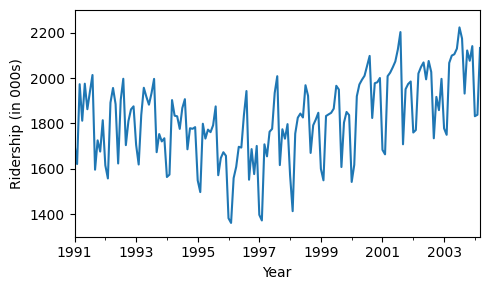

In [7]:
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()
plt.show()

Scatter Diagram of MEDV and LSTAT

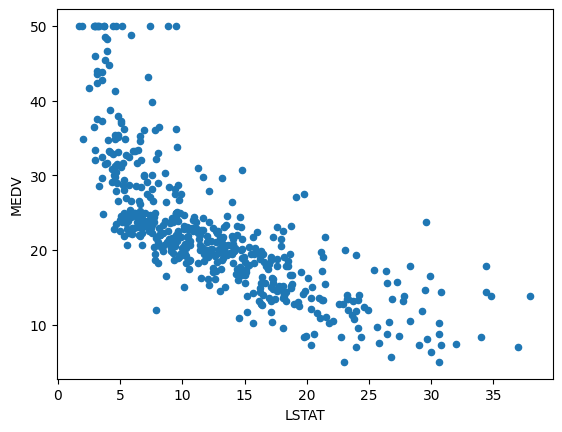

In [8]:
housing_df = dmba.load_data('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)
plt.show()

Bar Chart

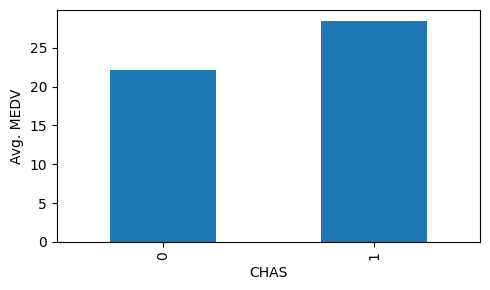

In [9]:
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

In [10]:
# Means based on CHAS
housing_df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


### Distribution Plots: Boxplots and Histograms

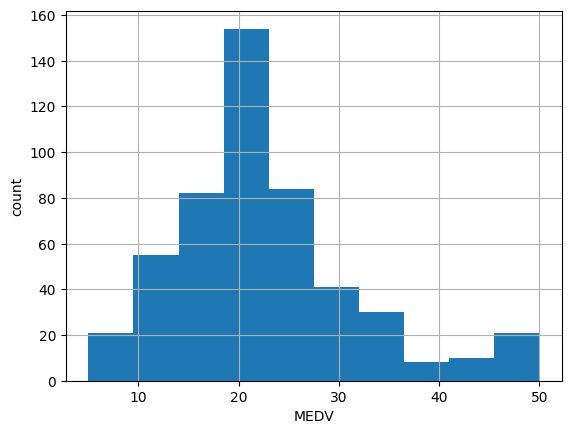

In [11]:
# Histogram of MEDV
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

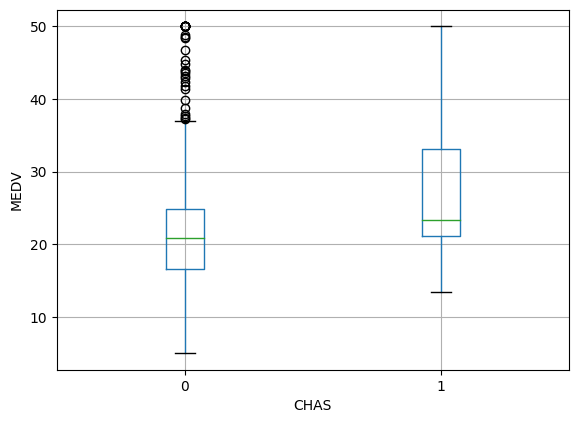

In [12]:
# Boxplot of MEDV based on CHAS
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

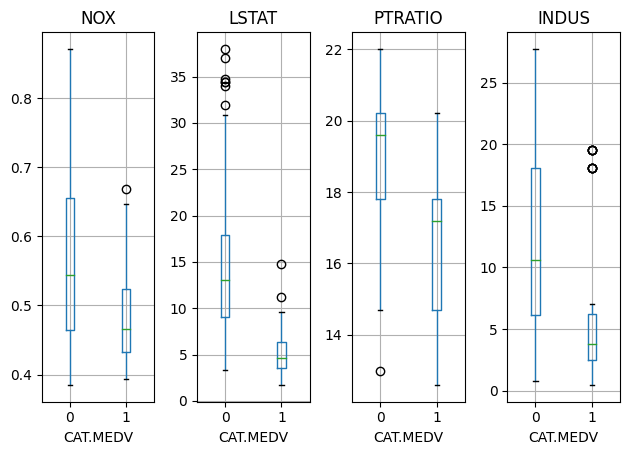

In [13]:
# boxplots side by side
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

### Heatmap

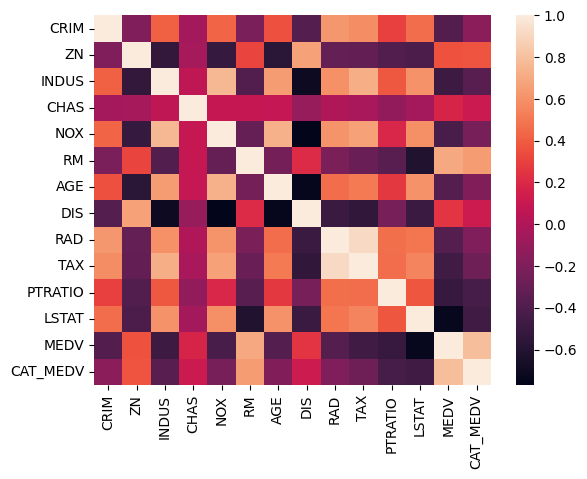

In [14]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

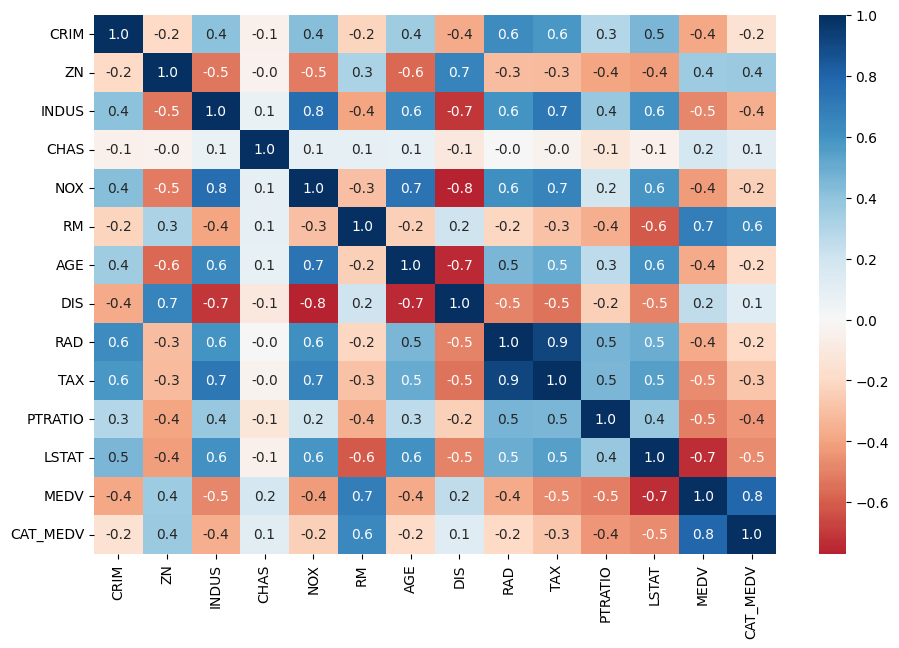

In [15]:
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

## Multidimensional Visualization

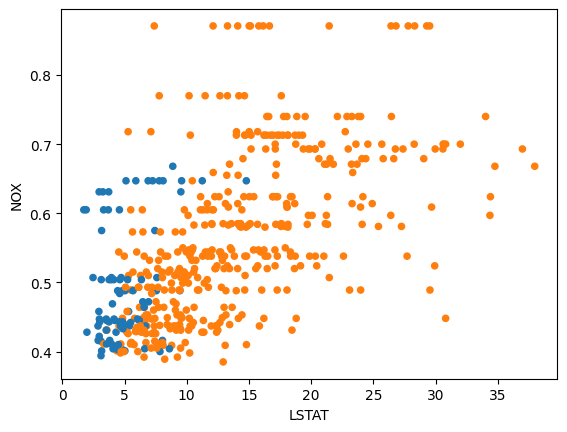

In [16]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX',
                        c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])
plt.show()

## Panel plots
### Compute mean MEDV per RAD and CHAS and create two bar charts for each value of RAD

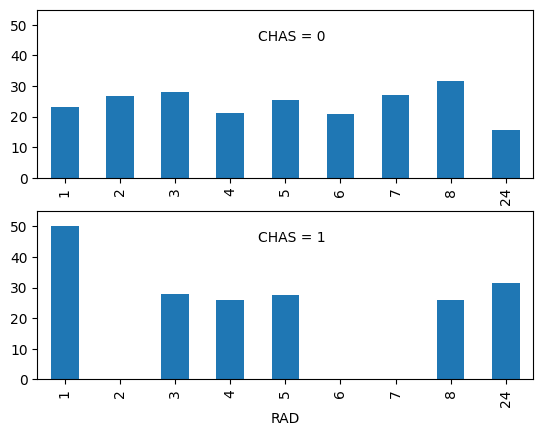

In [17]:
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))

plt.show()

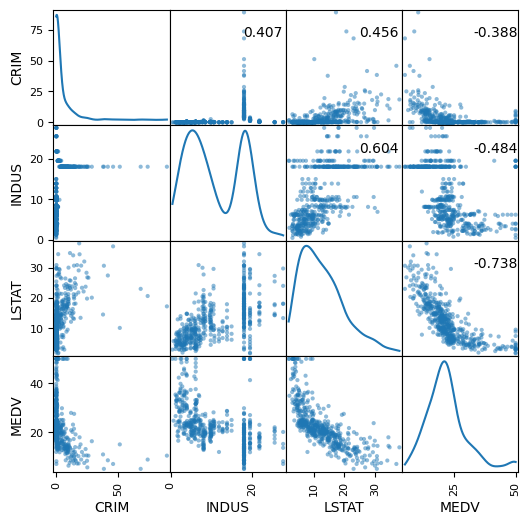

In [18]:
# Scatterplot matrix
# Add the correlation coefficient to the scatterplots above the diagonal
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

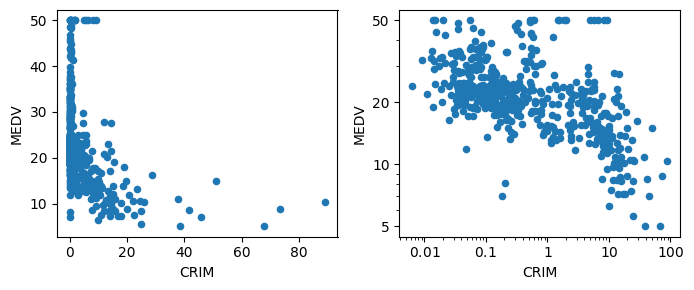

In [19]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

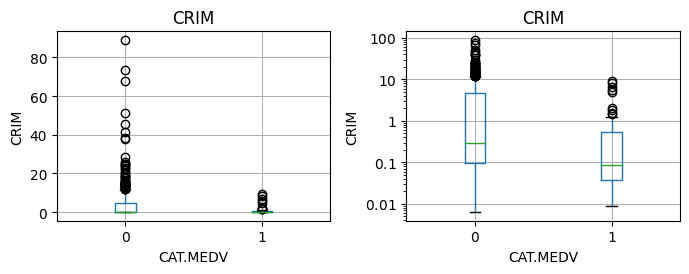

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

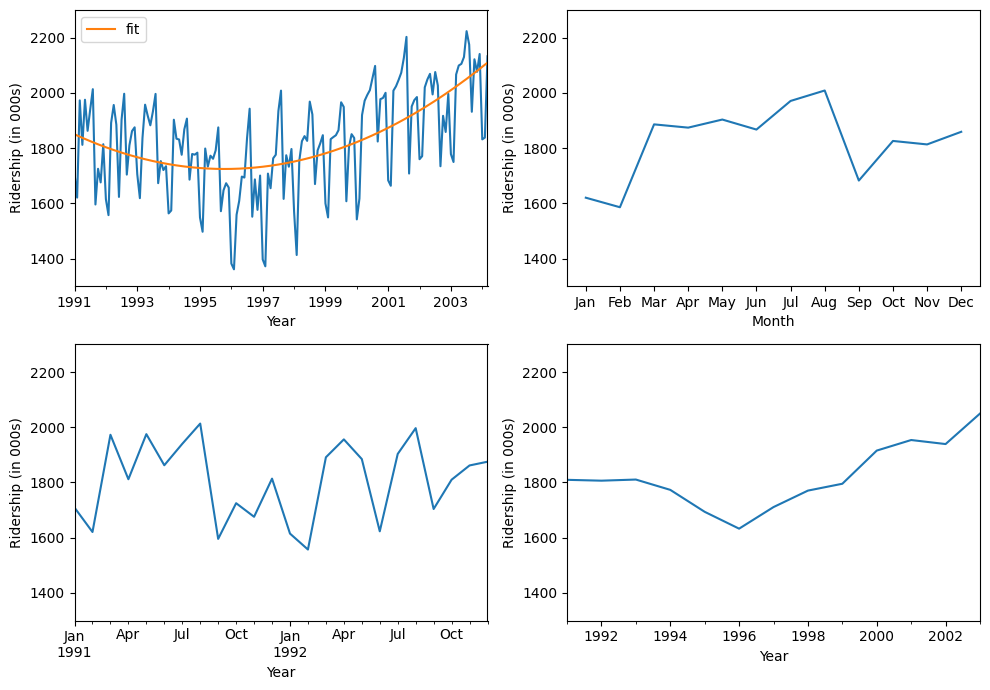

In [21]:
# time series charts over four panels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))


Amtrak_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)]);

# Average by year (exclude data from 2004)
byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()

plt.show()

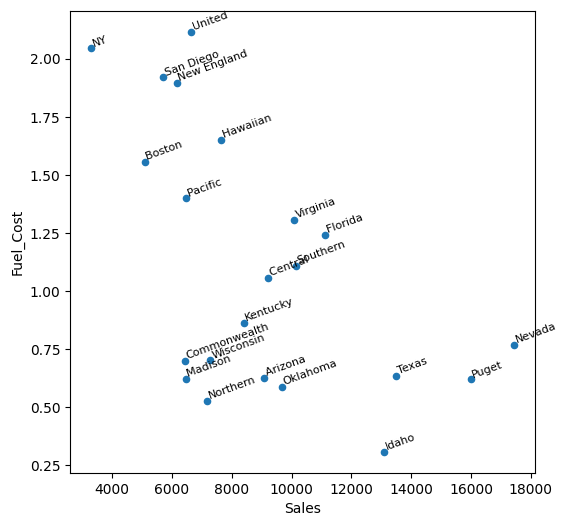

In [22]:
# with names
utilities_df = dmba.load_data('Utilities.csv')

ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))
points = utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x:
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

plt.show()

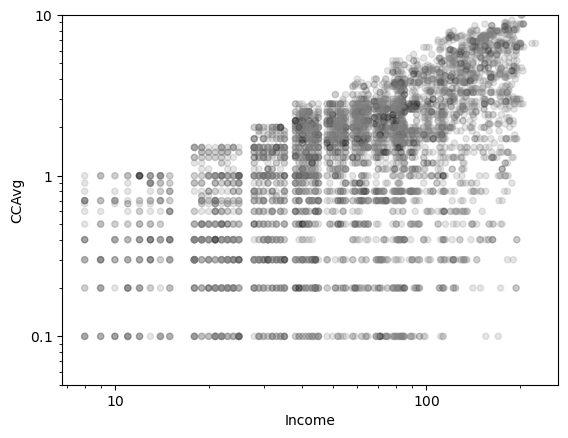

In [23]:
universal_df = dmba.load_data('UniversalBank.csv')

universal_df.plot.scatter(x='Income', y='CCAvg',
                          c=['black' if c == 1 else 'grey' for c in universal_df['Securities Account']],
                          ylim = (0.05, 10), alpha=0.2,
                          logx=True, logy=True)
plt.show()

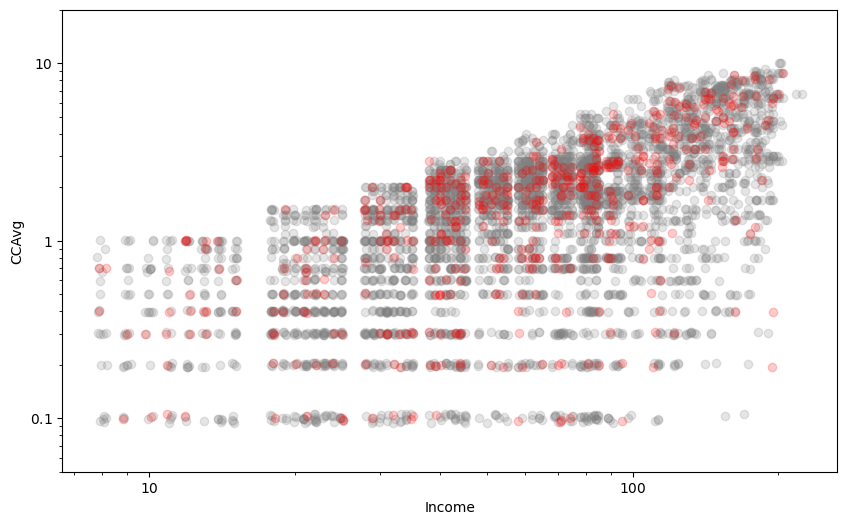

In [24]:
def jitter(x, factor=1):
    """ Add random jitter to x values """
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d > 0)
    a = factor * minDelta / 5
    return x + np.random.uniform(-a, a, len(x))


saIdx = universal_df[universal_df['Securities Account'] == 1].index

plt.figure(figsize=(10,6))
plt.scatter(jitter(universal_df.drop(saIdx).Income),
            jitter(universal_df.drop(saIdx).CCAvg),
            marker='o', color='grey', alpha=0.2)
plt.scatter(jitter(universal_df.loc[saIdx].Income),
            jitter(universal_df.loc[saIdx].CCAvg),
            marker='o', color='red', alpha=0.2)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")

plt.show()

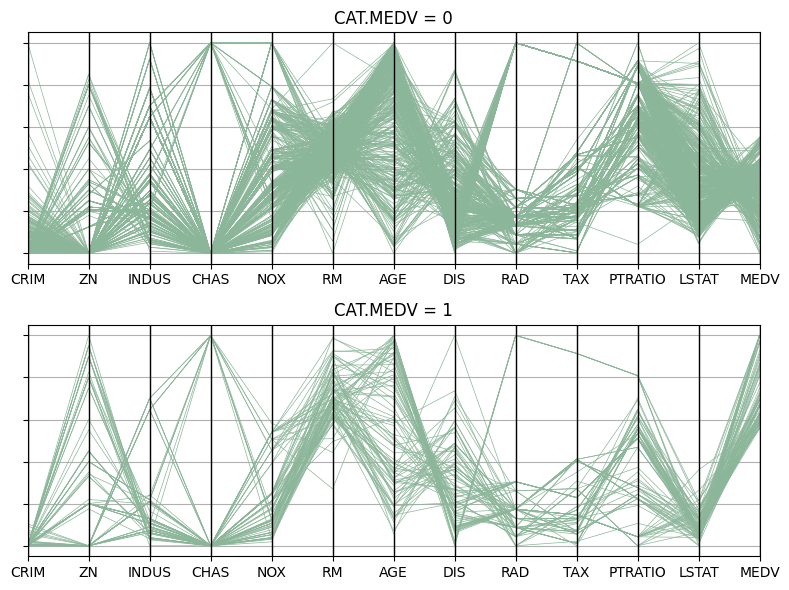

In [25]:
# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns=housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i],
                         'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT.MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()  # Increase the separation between the plots

plt.show()

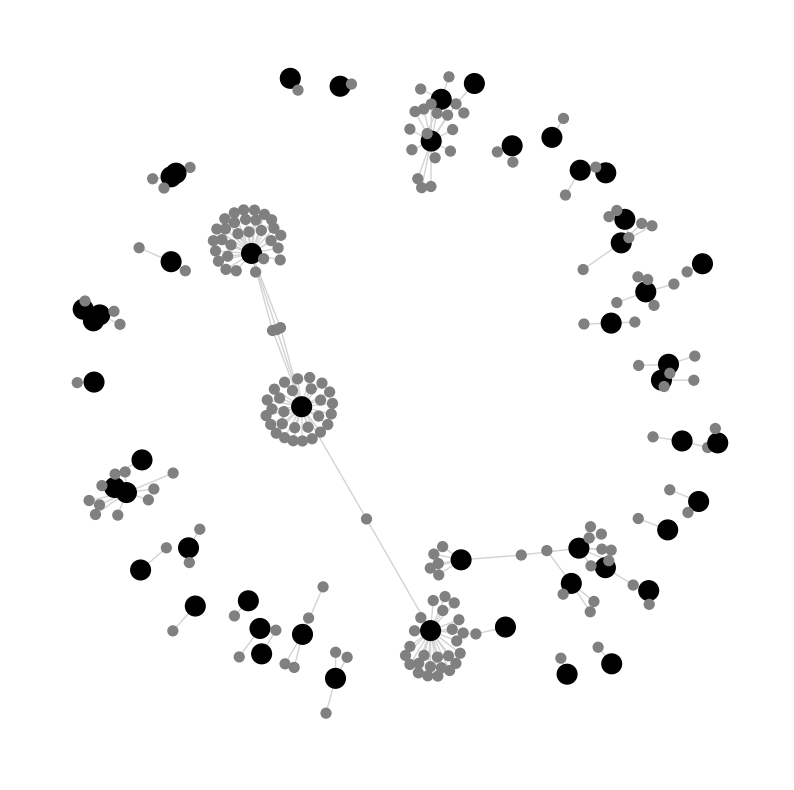

In [26]:
ebay_df = dmba.load_data('eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')

plt.show()

Make sure that you install squarify to run the coming block

In [27]:
pip install squarify

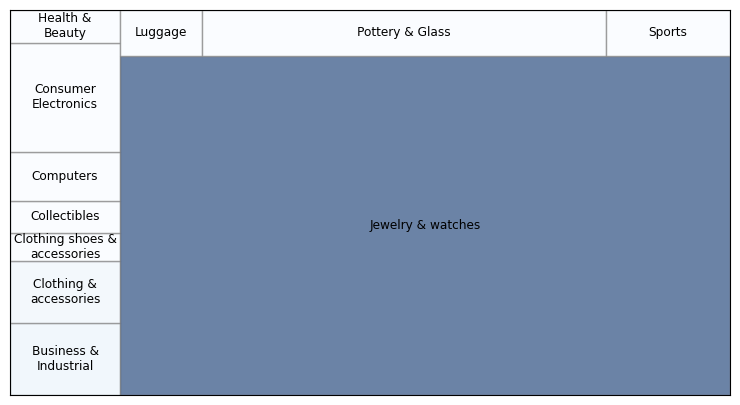

In [28]:
import squarify
import matplotlib

ebayTreemap = dmba.load_data('EbayTreemap.csv')

grouped = []
for category, df in ebayTreemap.groupby('Category'):
    negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean()
    })
byCategory = pd.DataFrame(grouped)

norm = matplotlib.colors.Normalize(vmin=byCategory.negativeFeedback.min(), vmax=byCategory.negativeFeedback.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]

fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

renameCategories = {
    'Business & Industrial': 'Business &\nIndustrial',
    'Health & Beauty': 'Health &\nBeauty',
    'Consumer Electronics': 'Consumer\nElectronics',
    'Clothing & accessories': 'Clothing &\naccessories',
    'Clothing shoes & accessories': 'Clothing shoes &\naccessories'
}
labels = [renameCategories.get(c, c) for c in byCategory.category]

squarify.plot(label=labels, sizes=byCategory.averageBid, color=colors,
              ax=ax, alpha=0.6, edgecolor='grey', text_kwargs={'fontsize': 8.7})

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.subplots_adjust(left=0.1)
plt.show()
# labels

In [29]:
if 'GMAPS_API_KEY' in os.environ:
    import gmaps
    SCstudents = dmba.load_data('SC-US-students-GPS-data-2016.csv')

    gmaps.configure(api_key=os.environ['GMAPS_API_KEY'])
    fig = gmaps.figure(center=(39.7, -105), zoom_level=3)
    fig.add_layer(gmaps.symbol_layer(SCstudents, scale=2,
                                     fill_color='red', stroke_color='red'))
    fig

In [30]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline

In [31]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.4 MB/s eta 0:00:00


In [32]:
import warnings
from cartopy.io import DownloadWarning

# warnings.filterwarnings('ignore', category=DownloadWarning)

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


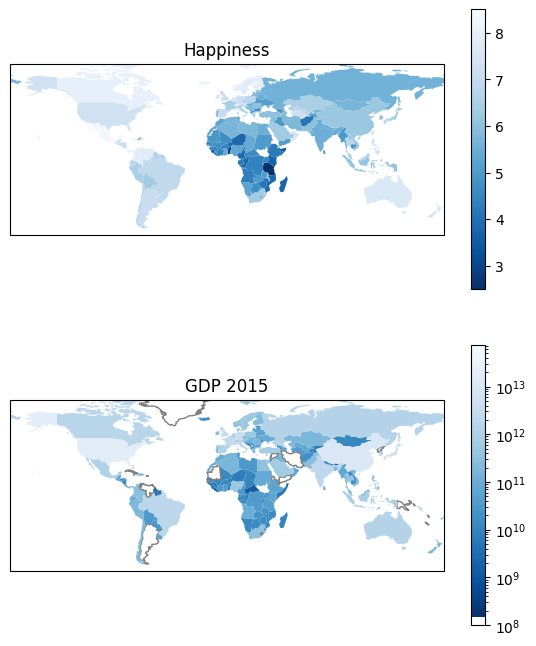

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

gdp_df = dmba.load_data('gdp.csv', skiprows=4)
gdp_df = gdp_df.rename(columns={'2015': 'GDP2015'})
gdp_df = gdp_df.set_index('Country Code')  # use the three letter country code to access rows

# The file contains a column with two letter combinations, use na_filter to avoid converting
# the combination NA into not-a-number
happiness_df = dmba.load_data('Veerhoven.csv', na_filter = False)
happiness_df = happiness_df.set_index('Code')  # use the country name to access rows


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax1.set_extent([-150, 60, -25, 60])
ax2.set_extent([-150, 60, -25, 60])

# Create a color mapper
cmap = plt.cm.Blues_r
norm1 = matplotlib.colors.Normalize(vmin=happiness_df.Score.dropna().min(),
                                    vmax=happiness_df.Score.dropna().max())
norm2 = matplotlib.colors.LogNorm(vmin=gdp_df.GDP2015.dropna().min(),
                                  vmax=gdp_df.GDP2015.dropna().max())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    countryCode = country.attributes['ADM0_A3']
    if countryCode in gdp_df.index:
        if pd.isna(gdp_df.loc[countryCode].GDP2015):
            ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                                edgecolor='grey', facecolor='white')
        else:
            ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                                facecolor=cmap(norm2(gdp_df.loc[countryCode].GDP2015)))
    # check various attributes to find the matching two-letter combinations
    nation = country.attributes['POSTAL']
    if nation not in happiness_df.index:
        nation = country.attributes['ISO_A2']
    if nation not in happiness_df.index:
        nation = country.attributes['WB_A2']
    if nation not in happiness_df.index and country.attributes['NAME'] == 'Norway':
        nation = 'NO'
    if nation in happiness_df.index:
        ax1.add_geometries([country.geometry], ccrs.PlateCarree(),
                           facecolor=cmap(norm1(happiness_df.loc[nation].Score)))

ax2.set_title("GDP 2015")
sm = plt.cm.ScalarMappable(norm=norm2, cmap=cmap)
cb = plt.colorbar(sm, ax=ax2)
cb.set_ticks([1e8, 1e9, 1e10, 1e11, 1e12, 1e13])

ax1.set_title("Happiness")
sm = plt.cm.ScalarMappable(norm=norm1, cmap=cmap)
cb = plt.colorbar(sm, ax=ax1)
cb.set_ticks([3, 4, 5, 6, 7, 8])


plt.show()

In [38]:
gdp_df

,Country Name,Indicator Name,Indicator Code,GDP2015
Country Code,,,,
ABW,Aruba,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
AND,Andorra,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
AFG,Afghanistan,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.919944e+10
AGO,Angola,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.026430e+11
ALB,Albania,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.145560e+10
...,...,...,...,...
YEM,"Yemen, Rep.",GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
ZAF,South Africa,GDP at market prices (current US$),NY.GDP.MKTP.CD,3.127980e+11
COD,"Congo, Dem. Rep.",GDP at market prices (current US$),NY.GDP.MKTP.CD,3.523774e+10


In [41]:
# Optional for Bonus points
# ADTA 5230 Chapter 3 Class Exercises-1

